In [1]:
"""
Team Gamma
COMP262
"""

'\nTeam Gamma\nCOMP262\n'

In [2]:
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In [3]:
current_dir = Path.cwd()
data_path = current_dir / "Industrial_and_Scientific_5.json"

print("current_dir:", current_dir)
print("data_path:", data_path)

current_dir: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP262-NLP_RS/Project/W25_COMP262_002_TeamGamma
data_path: /Users/rebecca/Documents/CROUSE/Winter-2025/COMP262-NLP_RS/Project/W25_COMP262_002_TeamGamma/Industrial_and_Scientific_5.json


In [4]:
dataset = pd.read_json(data_path,orient='records',lines=True)

In [5]:
"""
1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.
For example, look at:
a. Counts, averages
"""

'\n1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.\nFor example, look at:\na. Counts, averages\n'

In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
dataset.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None",Couldn't have been happier with it's performance,1511740800,NaN,NaN
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that.",Handy!,1509062400,NaN,NaN
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to buying it at the big box stores by the sheet.,seems like a pretty good value as opposed to buying it ...,1507334400,NaN,NaN


In [8]:
dataset.describe()

,overall,unixReviewTime
count,77071.000000,7.707100e+04
mean,4.524062,1.454857e+09
std,0.949668,4.559407e+07
min,1.000000,1.051402e+09
25%,4.000000,1.427674e+09
50%,5.000000,1.459469e+09
75%,5.000000,1.486944e+09
max,5.000000,1.538093e+09


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77071 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         77071 non-null  int64 
 1   verified        77071 non-null  bool  
 2   reviewTime      77071 non-null  object
 3   reviewerID      77071 non-null  object
 4   asin            77071 non-null  object
 5   style           36037 non-null  object
 6   reviewerName    77044 non-null  object
 7   reviewText      77060 non-null  object
 8   summary         77061 non-null  object
 9   unixReviewTime  77071 non-null  int64 
 10  vote            9620 non-null   object
 11  image           1719 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.5+ MB


In [10]:
#drop null column of reviewText
data_without_nan = dataset.dropna(subset=['reviewText'])

In [11]:
# remove product has only 1 review
product_review_counts = data_without_nan['asin'].value_counts()
valid_products = product_review_counts[product_review_counts > 1].index
data_without_one = data_without_nan[data_without_nan['asin'].isin(valid_products)]

In [12]:
data_without_one.shape

(77038, 12)

In [13]:
# g. Check for duplicates
from collections import Counter
duplicated_bool_p_r_ID_o_n_rt_urt = data_without_one.duplicated(subset=['reviewText','asin','reviewerID','overall','reviewerName','reviewTime','unixReviewTime'], keep='first')

Counter(duplicated_bool_p_r_ID_o_n_rt_urt)

Counter({False: 72670, True: 4368})

In [14]:
#keep first
data = data_without_one.drop_duplicates(
    subset=['reviewText', 'asin', 'reviewerID', 'overall', 'reviewerName', 'reviewTime', 'unixReviewTime'],
    keep='first'
)

print(data.shape)

(72670, 12)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72670 entries, 0 to 77070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         72670 non-null  int64 
 1   verified        72670 non-null  bool  
 2   reviewTime      72670 non-null  object
 3   reviewerID      72670 non-null  object
 4   asin            72670 non-null  object
 5   style           33650 non-null  object
 6   reviewerName    72643 non-null  object
 7   reviewText      72670 non-null  object
 8   summary         72667 non-null  object
 9   unixReviewTime  72670 non-null  int64 
 10  vote            9081 non-null   object
 11  image           1656 non-null   object
dtypes: bool(1), int64(2), object(9)
memory usage: 6.7+ MB


In [17]:
# b. Distribution of the number of reviews across products

In [18]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

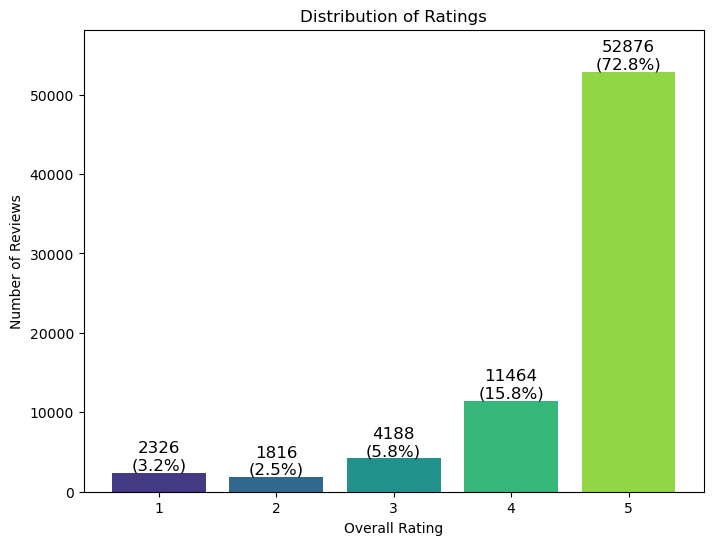

Ratings Distribution:
overall
1     2326
2     1816
3     4188
4    11464
5    52876
Name: count, dtype: int64


In [19]:
rating_counts = data['overall'].value_counts().sort_index()
total_reviews = rating_counts.sum()

colors = sns.color_palette("viridis", len(rating_counts))

plt.figure(figsize=(8,6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.xlabel("Overall Rating")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Ratings")
plt.ylim(0, rating_counts.max() * 1.1)

for bar in bars:
    height = bar.get_height()
    percentage = (height / total_reviews) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f"{height}\n({percentage:.1f}%)", 
             ha='center', va='bottom', fontsize=12)

plt.show()

print("Ratings Distribution:")
print(rating_counts)

In [20]:
# We map ratings 1 and 2 to NEGATIVE (0), 3 to NEUTRAL (1), and 4 and 5 to POSITIVE (2).
sentiment_score = {1: 0,
                   2: 0,
                   3: 1,
                   4: 2,
                   5: 2}
sentiment = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

In [21]:
data['overall'] = data['overall'].astype(int)
data['sentiment_score'] = data['overall'].map(sentiment_score)
data['label'] = data['sentiment_score'].map(sentiment)

In [22]:
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,sentiment_score,label
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None",Couldn't have been happier with it's performance,1511740800,NaN,NaN,2,POSITIVE
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN,2,POSITIVE
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that.",Handy!,1509062400,NaN,NaN,2,POSITIVE
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN,2,POSITIVE
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to buying it at the big box stores by the sheet.,seems like a pretty good value as opposed to buying it ...,1507334400,NaN,NaN,2,POSITIVE


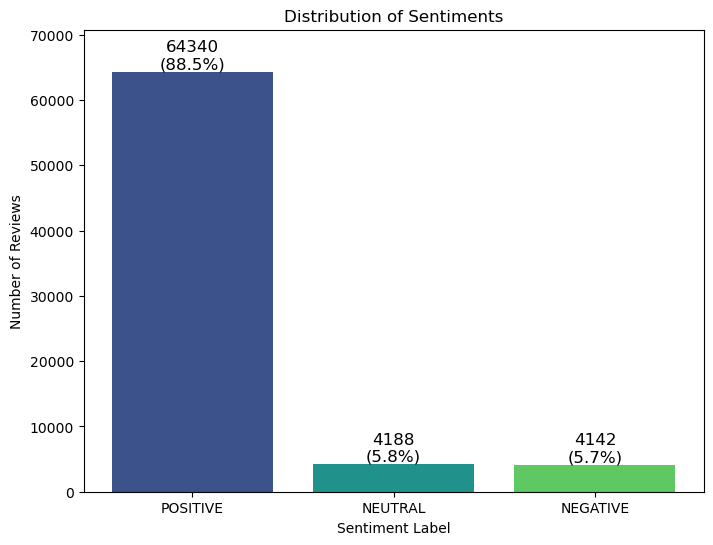

Sentiment Distribution:
label
POSITIVE    64340
NEUTRAL      4188
NEGATIVE     4142
Name: count, dtype: int64


In [23]:
rating_counts = data['label'].value_counts()

total_reviews = rating_counts.sum()

colors = sns.color_palette("viridis", len(rating_counts))

plt.figure(figsize=(8,6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)

plt.xlabel("Sentiment Label")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Sentiments")
plt.ylim(0, rating_counts.max() * 1.1)

for bar in bars:
    height = bar.get_height()
    percentage = (height / total_reviews) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f"{height}\n({percentage:.1f}%)", 
             ha='center', va='bottom', fontsize=12)

plt.show()

print("Sentiment Distribution:")
print(rating_counts)


In [24]:
num_across_products = data['asin'].value_counts()

In [25]:
num_across_products.head(10)

asin
B00DRALJ28    909
B0013BKDO8    614
B0001MSC84    304
B000EJUBBU    304
B0002EQU6C    205
B00837ZGRY    204
B00DMI632G    203
B005IQTSE0    188
B00J0GMMP6    165
B0006O1ICE    165
Name: count, dtype: int64

In [26]:
len(num_across_products)

5312

In [27]:
max(num_across_products.values)

909

In [28]:
min(num_across_products.values)

1

In [29]:
# c. Distribution of the number of reviews per product

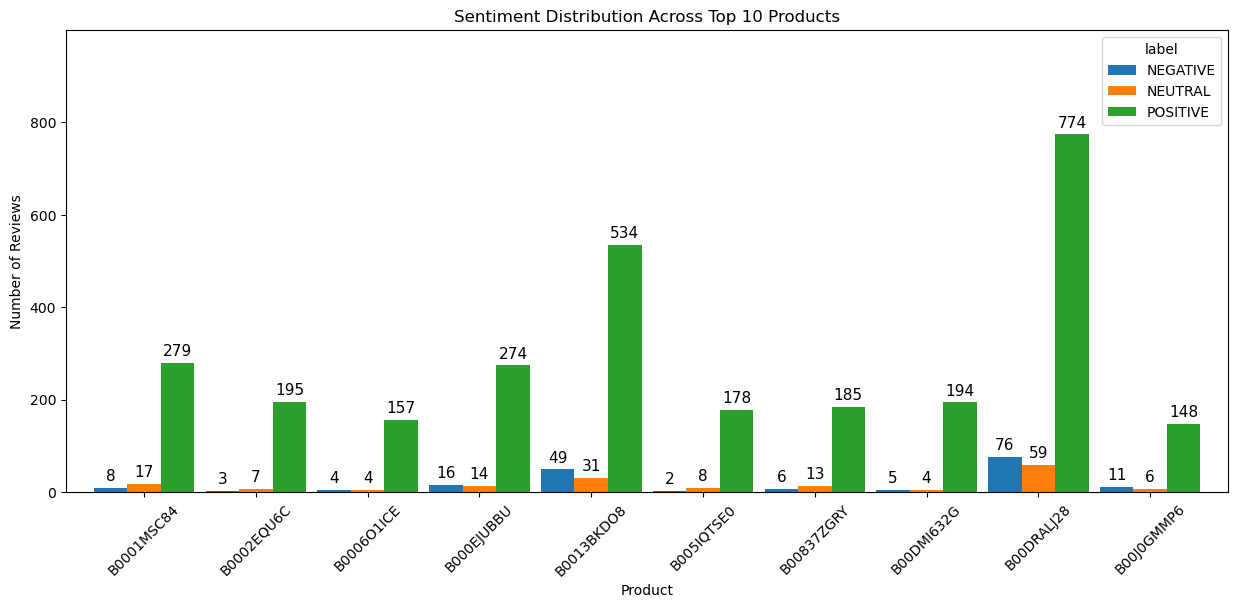

In [30]:
# Get the top 10 products based on the number of reviews (asin)
top_10_products = num_across_products.nlargest(10).index
data_top_10 = data[data['asin'].isin(top_10_products)]

# Count sentiments per product (asin) for the top 10 products
sentiment_counts = data_top_10.groupby(['asin', 'label']).size().unstack(fill_value=0)

# Plotting the sentiment distribution for the top 10 products
ax = sentiment_counts.plot(kind='bar', stacked=False, figsize=(15,6), width=0.9)
plt.title('Sentiment Distribution Across Top 10 Products')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, padding=3)
plt.ylim(0, num_across_products.max() * 1.1)
plt.show()

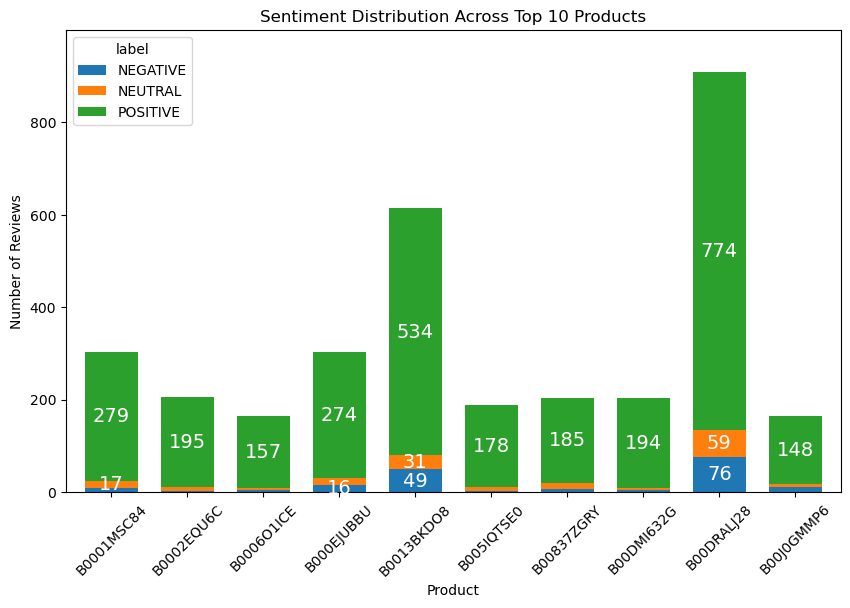

In [31]:
# Get the top 10 products based on the number of reviews (asin)
top_10_products = num_across_products.nlargest(10).index
data_top_10 = data[data['asin'].isin(top_10_products)]

# Count sentiments per product (asin) for the top 10 products
sentiment_counts = data_top_10.groupby(['asin', 'label']).size().unstack(fill_value=0)

# Plotting the sentiment distribution for the top 10 products
ax = sentiment_counts.plot(kind='bar', stacked=True, figsize=(10,6), width=0.7)
plt.title('Sentiment Distribution Across Top 10 Products')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 15:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + height / 2, 
                    f"{int(height)}", ha='center', va='center', fontsize=14, color='white')

plt.ylim(0, num_across_products.max() * 1.1)
plt.show()

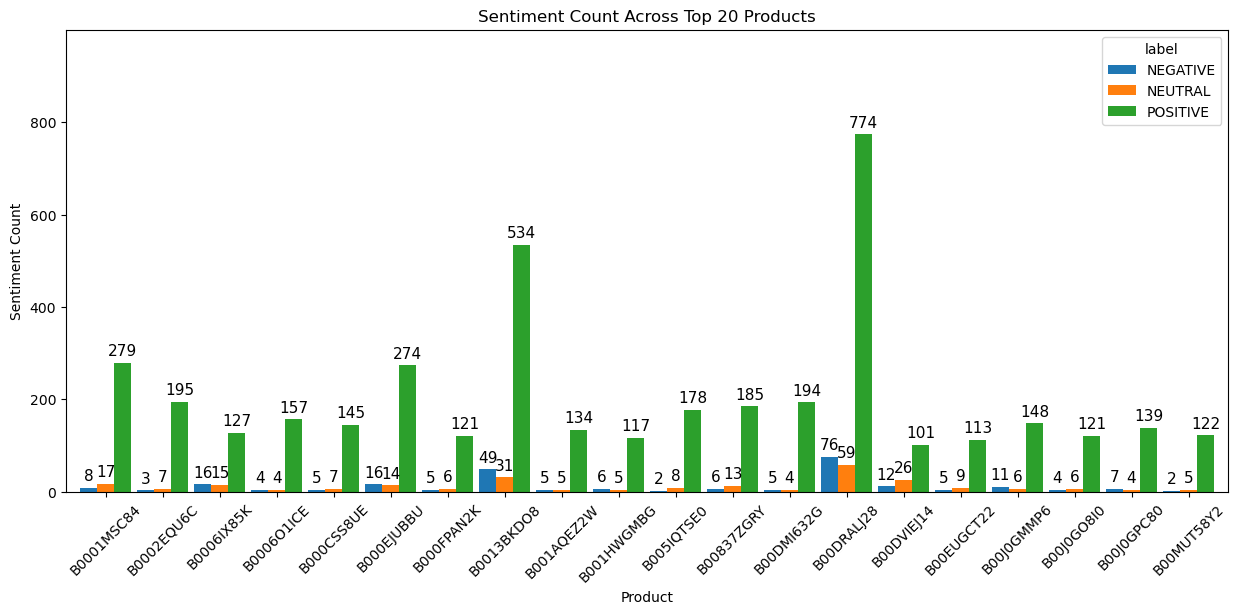

In [32]:
# Get the top 20 products based on the number of reviews (asin)
top_20_products = num_across_products.nlargest(20).index
data_top_20 = data[data['asin'].isin(top_20_products)]

# Count occurrences of each sentiment per product (asin)
sentiment_counts = data_top_20.groupby(['asin', 'label']).size().unstack(fill_value=0)

# Plotting the sentiment count (instead of the number of reviews)
ax = sentiment_counts.plot(kind='bar', stacked=False, figsize=(15,6), width=0.9)
plt.title('Sentiment Count Across Top 20 Products')
plt.xlabel('Product')
plt.ylabel('Sentiment Count')  # Change y-axis label
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11, padding=3)
plt.ylim(0, num_across_products.max() * 1.1)
plt.show()

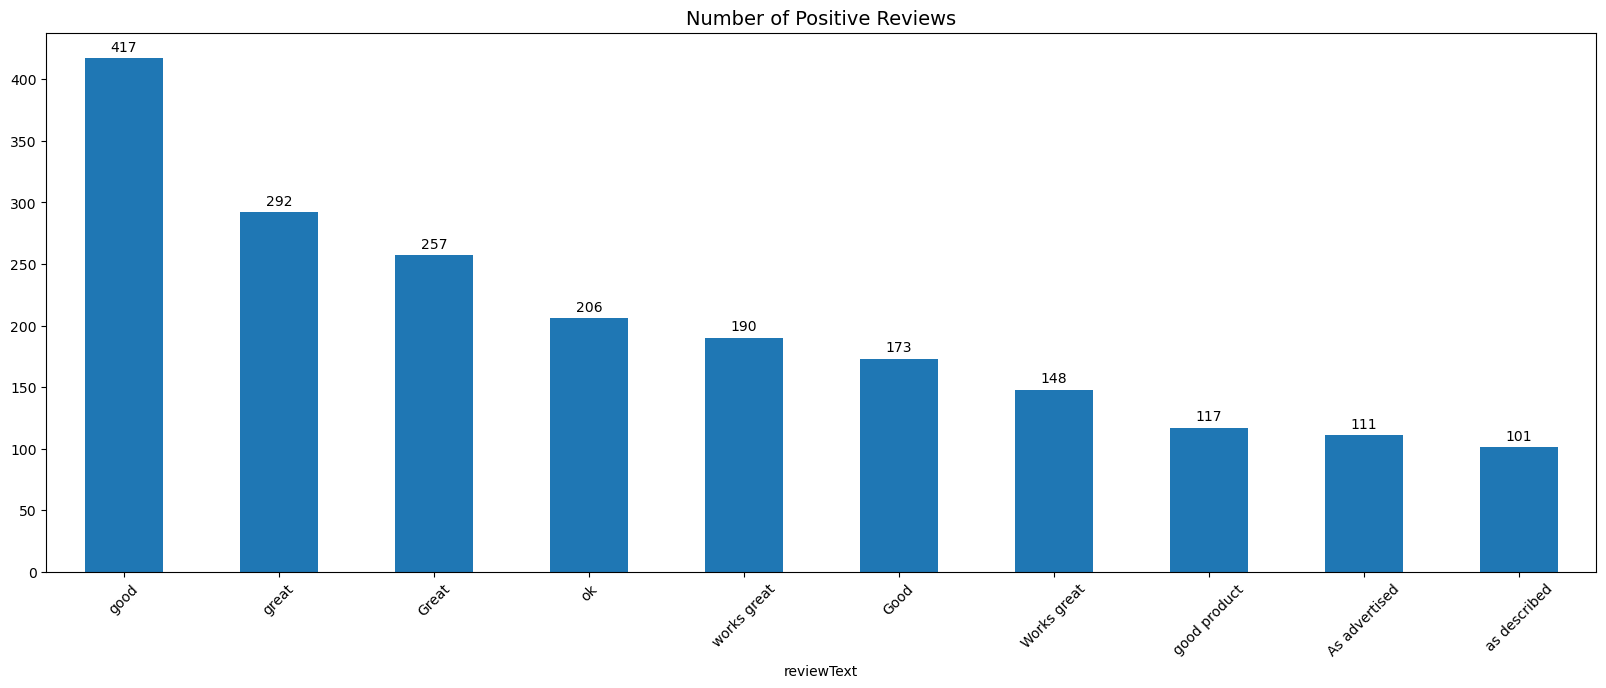

In [33]:
positive_review_counts = data[data['label'] == 'POSITIVE']['reviewText'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(20, 7))
bars = positive_review_counts.plot(kind='bar', ax=ax)

plt.title('Number of Positive Reviews', fontsize=14)
plt.xticks(rotation=45)
ax.bar_label(bars.containers[0], fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

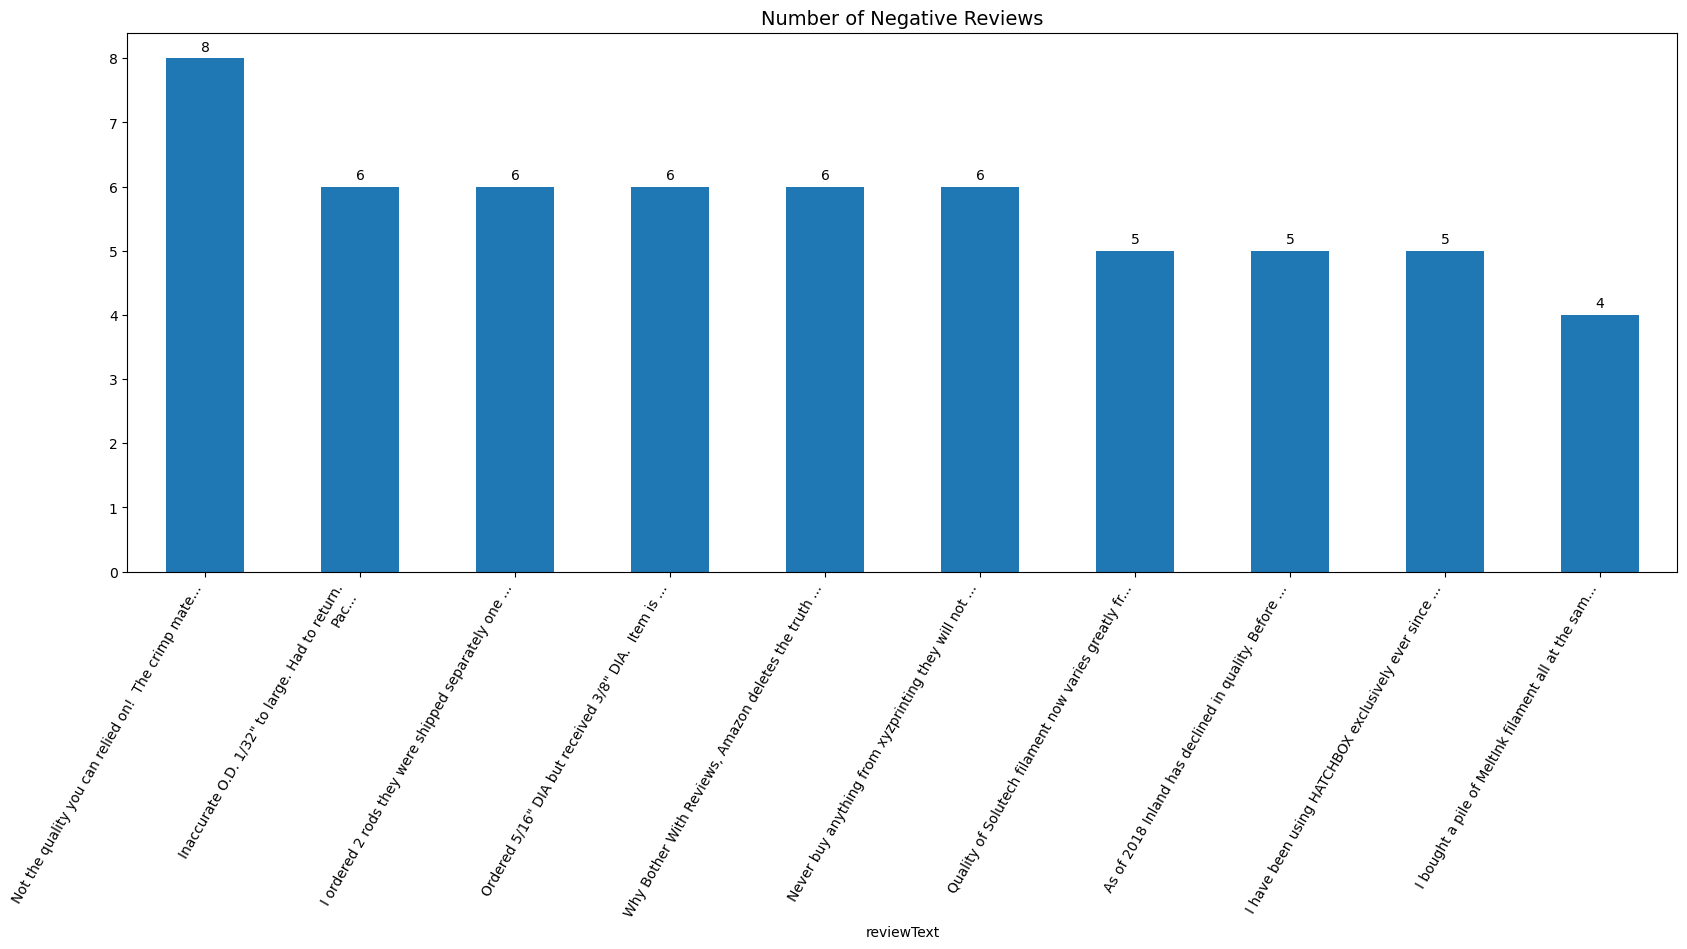

In [34]:
negative_review_counts = data[data['label'] == 'NEGATIVE']['reviewText'].value_counts().head(10)

short_labels = [text[:50] + "..." if len(text) > 50 else text for text in negative_review_counts.index]

fig, ax = plt.subplots(figsize=(20, 7))
bars = negative_review_counts.plot(kind='bar', ax=ax)

plt.title('Number of Negative Reviews', fontsize=14)
plt.xticks(range(len(short_labels)), short_labels, rotation=60, ha='right')
ax.bar_label(bars.containers[0], fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

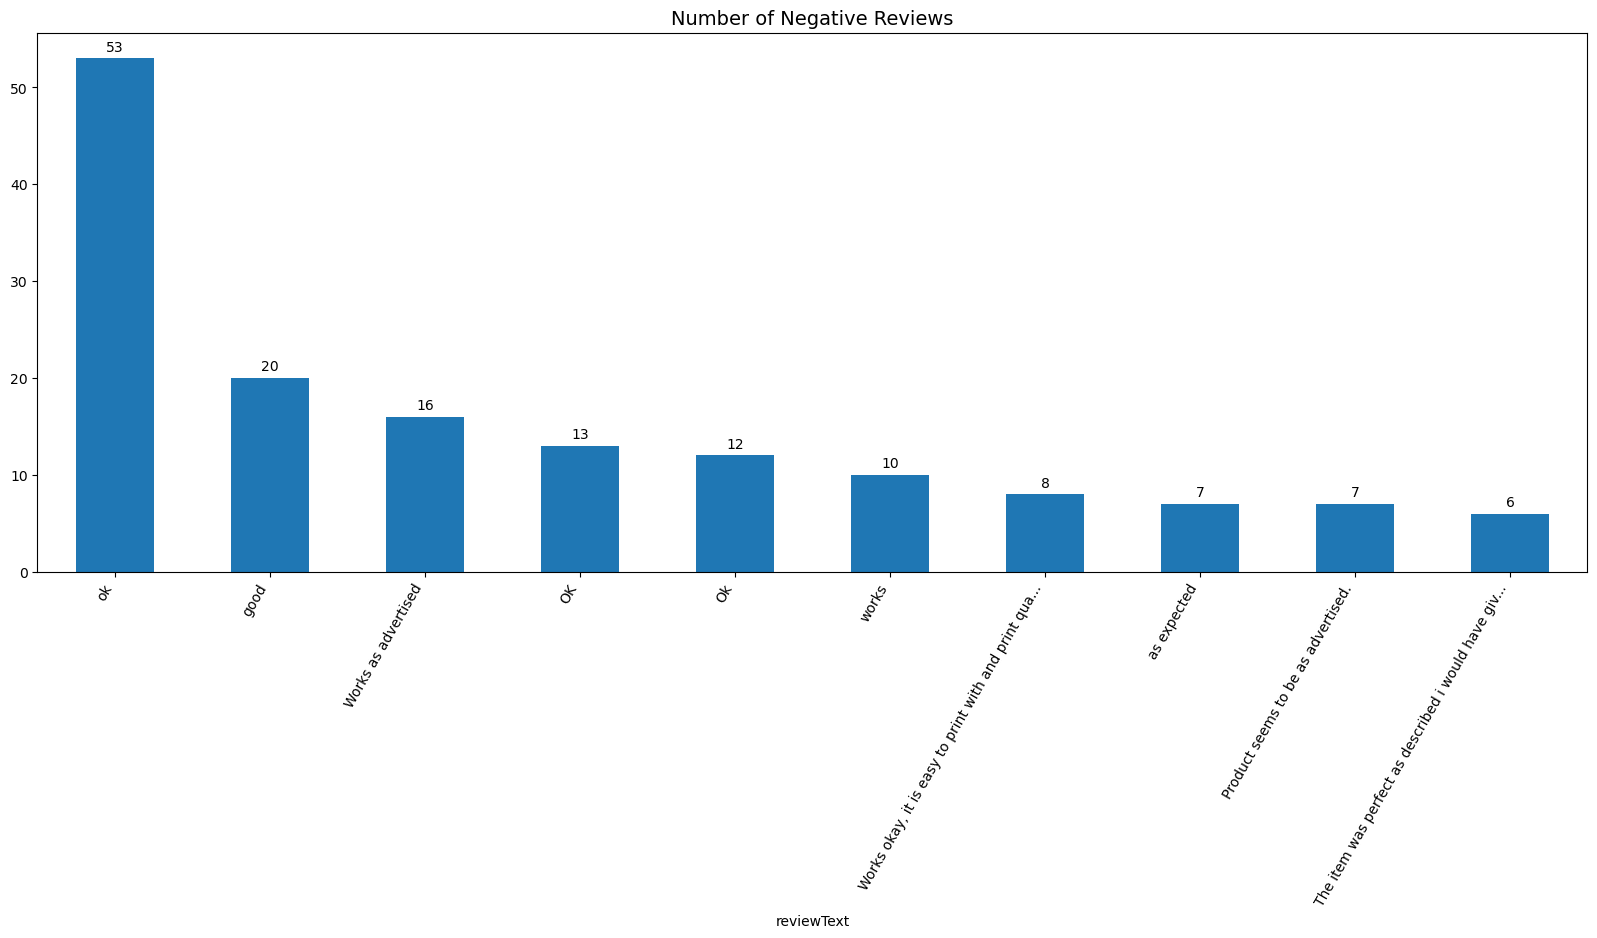

In [35]:
neutral_review_counts = data[data['label'] == 'NEUTRAL']['reviewText'].value_counts().head(10)

short_labels = [text[:50] + "..." if len(text) > 50 else text for text in neutral_review_counts.index]

fig, ax = plt.subplots(figsize=(20, 7))
bars = neutral_review_counts.plot(kind='bar', ax=ax)

plt.title('Number of Negative Reviews', fontsize=14)
plt.xticks(range(len(short_labels)), short_labels, rotation=60, ha='right')
ax.bar_label(bars.containers[0], fmt='%d', label_type='edge', fontsize=10, padding=3)
plt.show()

In [36]:
# d. Distribution of reviews per user

In [37]:
num_reviews_user = data['reviewerID'].value_counts()
print(num_reviews_user)

reviewerID
A3L1VJMHFWONCB    94
A2W19IAPS7ZSDK    64
A2JZUUAAK3HNHS    60
A3OXHLG6DIBRW8    50
A2J2MQ45S3N25N    47
                  ..
AU6I4SA8597OW      1
A1IDJT3M8G6RF2     1
A3S1DOPLH8I0GK     1
A1I2A0O6VMPB59     1
A22T7D3EJR2WE2     1
Name: count, Length: 11041, dtype: int64


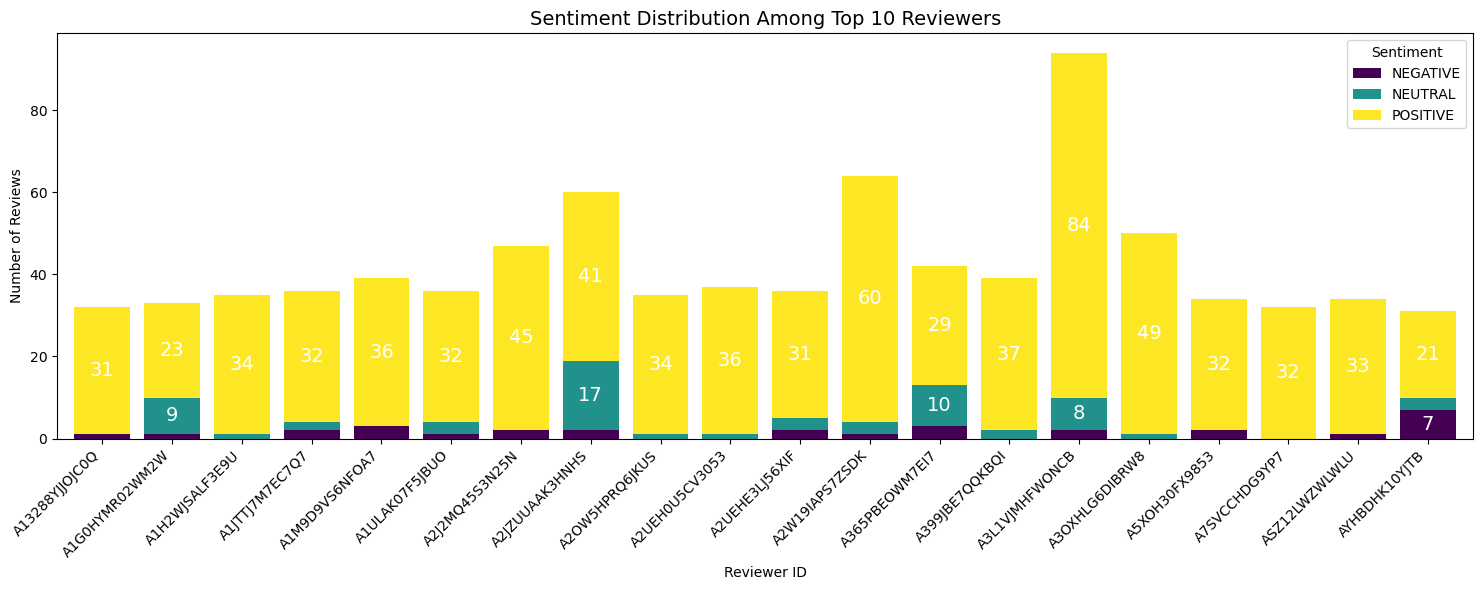

In [38]:
num_reviews_user = data['reviewerID'].value_counts()

top_20_users = num_reviews_user.nlargest(20).index

data_top_users = data[data['reviewerID'].isin(top_20_users)]

sentiment_counts = data_top_users.groupby(['reviewerID', 'label']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15,6))
sentiment_counts.plot(kind='bar', stacked=True, ax=ax, width=0.8, colormap='viridis')

plt.title("Sentiment Distribution Among Top 10 Reviewers", fontsize=14)
plt.xlabel("Reviewer ID")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 3:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + height / 2, 
                    f"{int(height)}", ha='center', va='center', fontsize=14, color='white')

plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


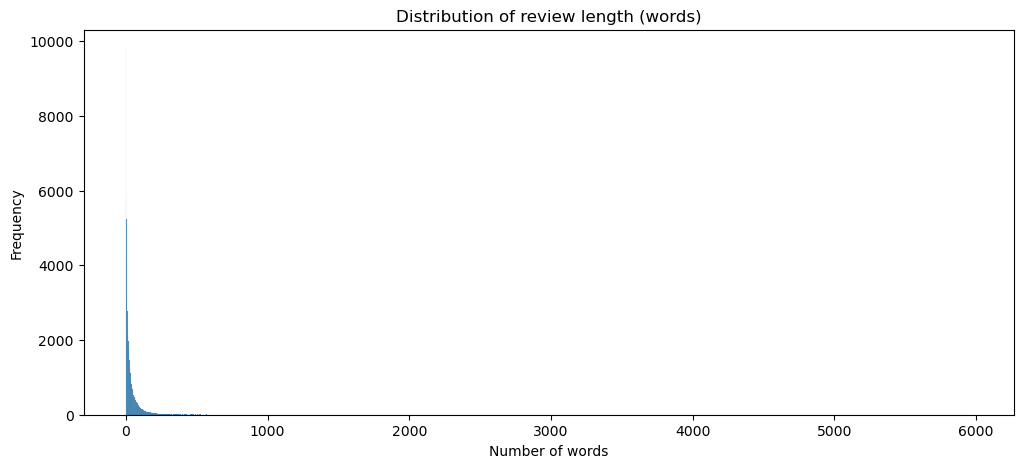

In [39]:
# e. Review lengths and outliers
data['reviewText_length_words'] = data['reviewText'].apply(lambda x: len(str(x).split()))
data['reviewText_length_chars'] = data['reviewText'].apply(lambda x: len(str(x)))

plt.figure(figsize=(12, 5))
sns.histplot(data['reviewText_length_words'])
plt.title('Distribution of review length (words)')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [40]:
Q1 = data['reviewText_length_words'].quantile(0.25)
Q3 = data['reviewText_length_words'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['reviewText_length_words'] < lower_bound) | (data['reviewText_length_words'] > upper_bound)]
print(f'Number of outlier reviews: {len(outliers)}')

Number of outlier reviews: 7005


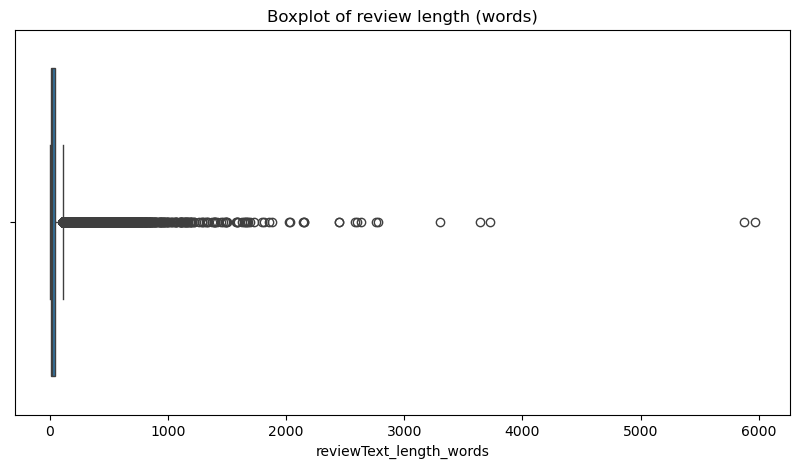

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['reviewText_length_words'])
plt.title('Boxplot of review length (words)')
plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72670 entries, 0 to 77070
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   overall                  72670 non-null  int64 
 1   verified                 72670 non-null  bool  
 2   reviewTime               72670 non-null  object
 3   reviewerID               72670 non-null  object
 4   asin                     72670 non-null  object
 5   style                    33650 non-null  object
 6   reviewerName             72643 non-null  object
 7   reviewText               72670 non-null  object
 8   summary                  72667 non-null  object
 9   unixReviewTime           72670 non-null  int64 
 10  vote                     9081 non-null   object
 11  image                    1656 non-null   object
 12  sentiment_score          72670 non-null  int64 
 13  label                    72670 non-null  object
 14  reviewText_length_words  72670 non-null  in

In [43]:
review_lenths = []

for review in data_without_nan["reviewText"]:
    len_review = len(review.split())
    review_lenths.append(len_review)

In [44]:
max(review_lenths)

5966

In [45]:
min(review_lenths)

1

In [46]:
# f. Analyze lengths

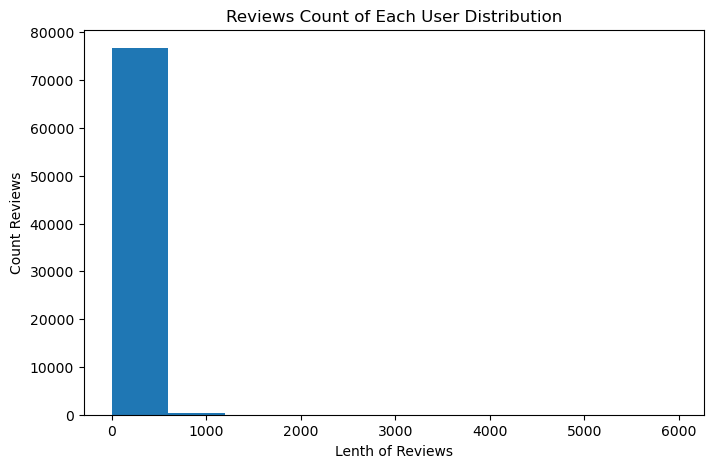

In [47]:
plt.figure(figsize=(8, 5))
plt.hist(review_lenths)
plt.xlabel('Lenth of Reviews')
plt.ylabel('Count Reviews')
plt.title('Reviews Count of Each User Distribution')
plt.show()

In [48]:
np.mean(review_lenths)

44.171334025434724

In [49]:
from scipy import stats

stats.mode(review_lenths)

ModeResult(mode=2, count=6636)

In [50]:
"""
2. Text basic pre-processing:
"""

'\n2. Text basic pre-processing:\n'

In [51]:
# Chose the appropriate columns for your sentiment analyzer. (Give this some thought) and mention in your report why you chose each column.

In [52]:
# length of summary is longer than length of reviewText
len_summary_longer = []
for i,(s,r) in enumerate(zip(data['summary'],data['reviewText'])):
    ls = len(str(s).split())
    lr = len(str(r).split())
    if ls > lr:
        len_summary_longer.append(i)
print(len(len_summary_longer))

3967


In [53]:
#replace "" with nan

data['summary'] = data['summary'].fillna('').astype(str)

In [54]:
data_for_sentiment_analyzer = data[['reviewText','summary','label']]

In [55]:
data_for_sentiment_analyzer.head()

,reviewText,summary,label
0,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None",Couldn't have been happier with it's performance,POSITIVE
1,Fast cutting and good adheasive.,Good paper.,POSITIVE
2,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that.",Handy!,POSITIVE
3,As advertised,As advertised,POSITIVE
4,seems like a pretty good value as opposed to buying it at the big box stores by the sheet.,seems like a pretty good value as opposed to buying it ...,POSITIVE


In [56]:
#c.Check for outliers

In [57]:
#3. Study the below three Lexicons packages and choose two for model building justify why you chose them:
# VADR + TextBlob

In [58]:
#4. Pre-process your text as needed, justify each pre-processing step for each model you chose. 
# (Note: take into account the findings of step #3 above)

In [59]:
data_for_sentiment_analyzer['full_text'] = data_for_sentiment_analyzer['summary']+" "+data_for_sentiment_analyzer['reviewText']

In [60]:
import re
def clean_text(text):
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', text)
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
    text = re.sub(r'[@#$%&*]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [61]:
data_for_sentiment_analyzer

,reviewText,summary,label,full_text
0,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None",Couldn't have been happier with it's performance,POSITIVE,"Couldn't have been happier with it's performance This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None"
1,Fast cutting and good adheasive.,Good paper.,POSITIVE,Good paper. Fast cutting and good adheasive.
2,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that.",Handy!,POSITIVE,"Handy! Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that."
3,As advertised,As advertised,POSITIVE,As advertised As advertised
4,seems like a pretty good value as opposed to buying it at the big box stores by the sheet.,seems like a pretty good value as opposed to buying it ...,POSITIVE,seems like a pretty good value as opposed to buying it ... seems like a pretty good value as opposed to buying it at the big box stores by the sheet.
...,...,...,...,...
77066,So far it has worked like a champ. Great solution for the standard heat bed.,I recommend it.,POSITIVE,I recommend it. So far it has worked like a champ. Great solution for the standard heat bed.
77067,Great quality solid state relay. I used this solid state relay to control my 3D printer heated bed. Its very reliable and takes the load off my print controller.,Great quality solid state relay,POSITIVE,Great quality solid state relay Great quality solid state relay. I used this solid state relay to control my 3D printer heated bed. Its very reliable and takes the load off my print controller.
77068,Came with everything needed to install in my Monoprice Makerselect v2. Now I can really crank up the temp on my heated bed to print ABS and not worry about killing my motherboard.,Exactly as described,POSITIVE,Exactly as described Came with everything needed to install in my Monoprice Makerselect v2. Now I can really crank up the temp on my heated bed to print ABS and not worry about killing my motherboard.
77069,"Installed a month ago in my Monoprice Maker Select V2 3D printer. It does the job, no problems.\nSimple circuit that does what it should. That makes it a good buy.",Works Great,POSITIVE,"Works Great Installed a month ago in my Monoprice Maker Select V2 3D printer. It does the job, no problems.\nSimple circuit that does what it should. That makes it a good buy."


In [62]:
data_for_sentiment_analyzer['full_clean'] = data_for_sentiment_analyzer['full_text'].apply(clean_text)

In [63]:
data_for_sentiment_analyzer.head()

,reviewText,summary,label,full_text,full_clean
0,"This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None",Couldn't have been happier with it's performance,POSITIVE,"Couldn't have been happier with it's performance This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper.\n\nPros:\n-Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper\n-Didn't even have a hint of clogging up.\n-The adhesive is just what I needed. No permanent, but wasn't going anywhere.\n\nCons:\n-None","Couldn't have been happier with it's performance This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper. Pros: -Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper -Didn't even have a hint of clogging up. -The adhesive is just what I needed. No permanent, but wasn't going anywhere. Cons: -None"
1,Fast cutting and good adheasive.,Good paper.,POSITIVE,Good paper. Fast cutting and good adheasive.,Good paper. Fast cutting and good adheasive.
2,"Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that.",Handy!,POSITIVE,"Handy! Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that.","Handy! Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that."
3,As advertised,As advertised,POSITIVE,As advertised As advertised,As advertised As advertised
4,seems like a pretty good value as opposed to buying it at the big box stores by the sheet.,seems like a pretty good value as opposed to buying it ...,POSITIVE,seems like a pretty good value as opposed to buying it ... seems like a pretty good value as opposed to buying it at the big box stores by the sheet.,seems like a pretty good value as opposed to buying it ... seems like a pretty good value as opposed to buying it at the big box stores by the sheet.


In [64]:
data_for_sentiment_analyzer = data_for_sentiment_analyzer[['label', 'full_clean']]

In [65]:
data_for_sentiment_analyzer.head()

,label,full_clean
0,POSITIVE,"Couldn't have been happier with it's performance This worked really well for what I used it for. So for my purposes it is getting full marks. This is an all around great, durable, and afforable sandpaper. Pros: -Grit cuts really fast and evenly. No random deep scratches like I have seen in some cheaper paper -Didn't even have a hint of clogging up. -The adhesive is just what I needed. No permanent, but wasn't going anywhere. Cons: -None"
1,POSITIVE,Good paper. Fast cutting and good adheasive.
2,POSITIVE,"Handy! Worked great for my lapping bench. I would like it if the adhesive were backed with waxed paper for storage and keeping the grit out, but all but the first 6 inches or so still functioned when it arrived. I used rubber cement to remedy that."
3,POSITIVE,As advertised As advertised
4,POSITIVE,seems like a pretty good value as opposed to buying it ... seems like a pretty good value as opposed to buying it at the big box stores by the sheet.


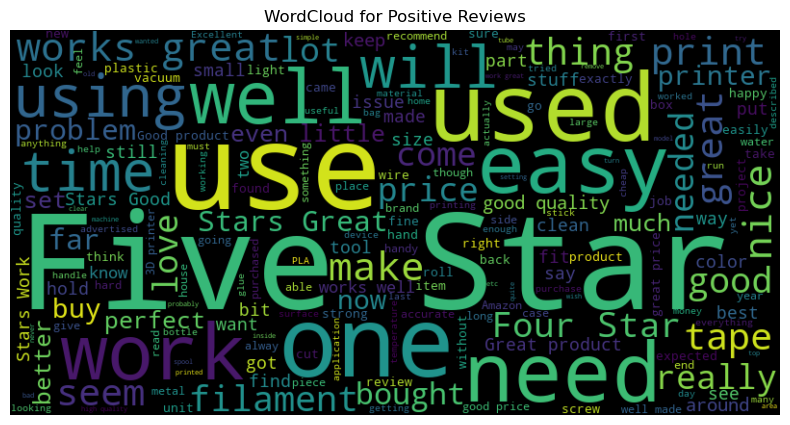

In [66]:
from wordcloud import WordCloud

positive_reviews = data_for_sentiment_analyzer[data_for_sentiment_analyzer['label'] == 'POSITIVE']['full_clean']
negative_reviews = data_for_sentiment_analyzer[data_for_sentiment_analyzer['label'] == 'NEGATIVE']['full_clean']
neutral_reviews = data_for_sentiment_analyzer[data_for_sentiment_analyzer['label'] == 'NEUTRAL']['full_clean']

all_text_pos = " ".join(positive_reviews.astype(str))
all_text_ng = " ".join(negative_reviews.astype(str))
all_text_neu = " ".join(neutral_reviews.astype(str))

wordcloud_pos = WordCloud(width=800, height=400).generate(all_text_pos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Positive Reviews")
plt.show()


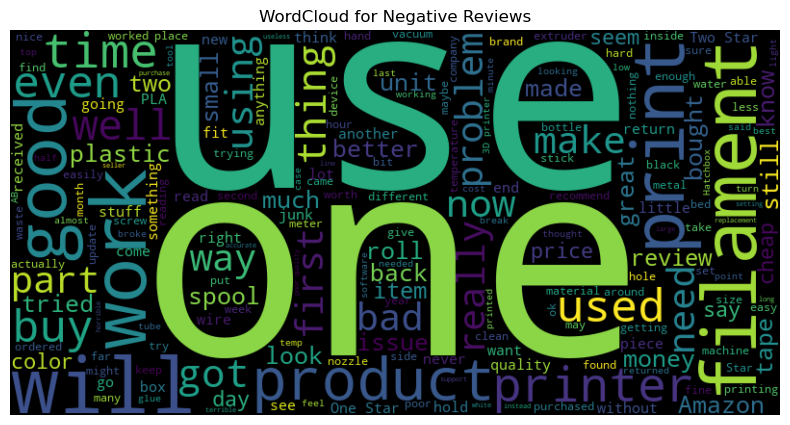

In [67]:
wordcloud_ng = WordCloud(width=800, height=400).generate(all_text_ng)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ng, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Negative Reviews")
plt.show()

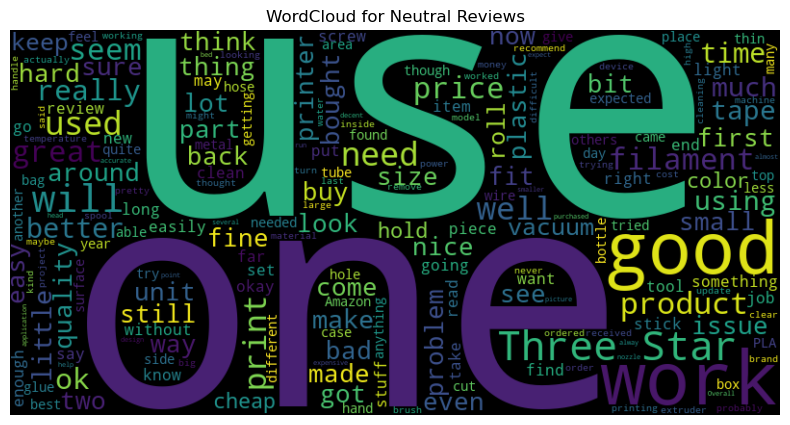

In [68]:
wordcloud_neu = WordCloud(width=800, height=400).generate(all_text_neu)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Neutral Reviews")
plt.show()

In [69]:
#5. Randomly select 1000 reviews from your dataset.

In [70]:
print(data_for_sentiment_analyzer['label'].value_counts())

label
POSITIVE    64340
NEUTRAL      4188
NEGATIVE     4142
Name: count, dtype: int64


In [71]:
from sklearn.model_selection import train_test_split

sampled_df, _ = train_test_split(data_for_sentiment_analyzer, train_size=1000, stratify=data_for_sentiment_analyzer['label'], random_state=42)

print(sampled_df['label'].value_counts())

label
POSITIVE    885
NEUTRAL      58
NEGATIVE     57
Name: count, dtype: int64


In [72]:
sampled_df.head()

,label,full_clean
53085,POSITIVE,"Nice quality and strength Nice quality and strength. Good adhesive. Only one tore when installing, was able to place so looks OK. Used good surface cleaner to help adhesive work best."
8051,POSITIVE,worked great. just make sure u use something to lube ... worked great. just make sure u use something to lube the whole or you'll tear it up. i didn't on first one and some threads got tore off.
9511,POSITIVE,Five Stars what i needed at a great
25391,POSITIVE,"Very good device mirror This Ullman Rectangular Inspection Mirror with Lights is very handy when working in tight places on your vehicle, I'm pleased with quality."
57102,POSITIVE,Great filament and a great Fav color so far in all of my filaments. Great filament and a great price


# TextBlob

In [73]:
sampled_df_blob = sampled_df

In [74]:
from textblob import TextBlob, Word
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize

In [75]:
def clean_text_textblob(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

In [76]:
sampled_df_blob['full_clean'] = sampled_df_blob['full_clean'].apply(clean_text_textblob)

In [77]:
#Tokenization
def tokenize_text(text):
    return word_tokenize(text.lower())

In [78]:
sampled_df_blob['tokenized_words'] = sampled_df_blob['full_clean'].apply(tokenize_text)

In [79]:
#Lemmatization
def lemmatize_words(tokens):
    return [Word(word).lemmatize() for word in tokens]

In [80]:
sampled_df_blob['lemmatization'] = sampled_df_blob['tokenized_words'].apply(lemmatize_words)

In [81]:
# Remove stop words
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words] 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebecca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rebecca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
sampled_df_blob['remove_stop_words'] = sampled_df_blob['lemmatization'].apply(remove_stopwords)

In [83]:
sampled_df_blob['cleaned_text'] = sampled_df_blob['remove_stop_words'].apply(lambda x: ' '.join(x))

In [84]:
sampled_df_blob['polarity'] = sampled_df_blob['cleaned_text'].astype(str).map(lambda text: TextBlob(text).sentiment.polarity)

sampled_df_blob['review_len'] = sampled_df_blob['cleaned_text'].astype(str).apply(len)
sampled_df_blob['word_count'] = sampled_df_blob['cleaned_text'].apply(lambda x: len(str(x).split()))

In [85]:
sampled_df_blob['blob_sentiment_label'] = sampled_df_blob['polarity'].apply(lambda x: 'POSITIVE' if x > 0.05 else ('NEGATIVE' if x < -0.05 else 'NEUTRAL'))

sampled_df_blob[['full_clean', 'cleaned_text', 'polarity', 'blob_sentiment_label']]

,full_clean,cleaned_text,polarity,blob_sentiment_label
53085,nice quality and strength nice quality and strength good adhesive only one tore when installing was able to place so looks ok used good surface cleaner to help adhesive work best,nice quality strength nice quality strength good adhesive one tore installing wa able place look ok used good surface cleaner help adhesive work best,0.657143,POSITIVE
8051,worked great just make sure u use something to lube worked great just make sure u use something to lube the whole or youll tear it up i didnt on first one and some threads got tore off,worked great make sure u use something lube worked great make sure u use something lube whole youll tear didnt first one thread got tore,0.508333,POSITIVE
9511,five stars what i needed at a great,five star needed great,0.800000,POSITIVE
25391,very good device mirror this ullman rectangular inspection mirror with lights is very handy when working in tight places on your vehicle im pleased with quality,good device mirror ullman rectangular inspection mirror light handy working tight place vehicle im pleased quality,0.404286,POSITIVE
57102,great filament and a great fav color so far in all of my filaments great filament and a great price,great filament great fav color far filament great filament great price,0.660000,POSITIVE
...,...,...,...,...
3694,five stars great,five star great,0.800000,POSITIVE
56357,five stars great product at best price thank you,five star great product best price thank,0.900000,POSITIVE
7074,five stars she loves it,five star love,0.500000,POSITIVE
7313,good product for the price i am going to have to order some more of this its been awhile since i purchased it but just got around to writing this review really handy item when you do small electrical connections its got a neat appearance as well having a safety factor plus it does save some on electrical tape i would definitely recommend this product,good product price going order awhile since purchased got around writing review really handy item small electrical connection got neat appearance well safety factor plus doe save electrical tape would definitely recommend product,0.262500,POSITIVE


In [86]:
from wordcloud import WordCloud,STOPWORDS

In [87]:
from sklearn.metrics import classification_report
report_textblob = classification_report(sampled_df_blob['label'], sampled_df_blob['blob_sentiment_label'],output_dict=True)
print(report_textblob)

{'NEGATIVE': {'precision': 0.28, 'recall': 0.24561403508771928, 'f1-score': 0.2616822429906542, 'support': 57.0}, 'NEUTRAL': {'precision': 0.08904109589041095, 'recall': 0.22413793103448276, 'f1-score': 0.12745098039215685, 'support': 58.0}, 'POSITIVE': {'precision': 0.9116915422885572, 'recall': 0.8282485875706215, 'f1-score': 0.8679692125518058, 'support': 885.0}, 'accuracy': 0.76, 'macro avg': {'precision': 0.42691087939298944, 'recall': 0.43266685123094123, 'f1-score': 0.41903414531153893, 'support': 1000.0}, 'weighted avg': {'precision': 0.8279713984870171, 'recall': 0.76, 'f1-score': 0.7904607978215606, 'support': 1000.0}}


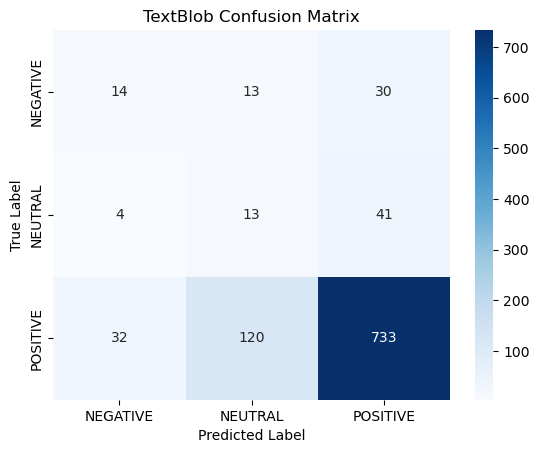

In [88]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(sampled_df_blob['label'], sampled_df_blob['blob_sentiment_label'], labels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("TextBlob Confusion Matrix")
plt.show()

# VADR

In [89]:
#6. Modeling (Sentiment Analysis) Lexicon approach:
#a.Build two sentiment analysis models using the labeled pre-processed data for both the lexicons packages the team selected in step #3 above.

In [90]:
#VADR
#install VADR ->
#conda install conda-forge::vadersentiment
#or
#pip install vaderSentiment

In [91]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#from vaderSentiment import SentimentIntensityAnalyzer

In [92]:
sampled_df_vadr = sampled_df

In [93]:
analyzer = SentimentIntensityAnalyzer()

In [94]:
vadr_score = []
compound_score = []
predict_label =[]

In [95]:
# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

In [96]:
for sentence in sampled_df_vadr['full_clean']:
    vs = analyzer.polarity_scores(sentence)
    
    vadr_score.append(vs)
    
    compound_s = vs['compound']
    compound_score.append(compound_s)
    
    if compound_s >= 0.05:
        predict_label.append('POSITIVE')
    elif compound_s <= -0.05:
        predict_label.append('NEGATIVE')
    else:
        predict_label.append('NEUTRAL')
    

In [97]:
sampled_df_vadr['vadr_score'] = vadr_score
sampled_df_vadr['compound_score'] = compound_score
sampled_df_vadr['predict_label'] = predict_label

In [98]:
sampled_df_vadr.head()

,label,full_clean,tokenized_words,lemmatization,remove_stop_words,cleaned_text,polarity,review_len,word_count,blob_sentiment_label,vadr_score,compound_score,predict_label
53085,POSITIVE,nice quality and strength nice quality and strength good adhesive only one tore when installing was able to place so looks ok used good surface cleaner to help adhesive work best,"[nice, quality, and, strength, nice, quality, and, strength, good, adhesive, only, one, tore, when, installing, was, able, to, place, so, looks, ok, used, good, surface, cleaner, to, help, adhesive, work, best]","[nice, quality, and, strength, nice, quality, and, strength, good, adhesive, only, one, tore, when, installing, wa, able, to, place, so, look, ok, used, good, surface, cleaner, to, help, adhesive, work, best]","[nice, quality, strength, nice, quality, strength, good, adhesive, one, tore, installing, wa, able, place, look, ok, used, good, surface, cleaner, help, adhesive, work, best]",nice quality strength nice quality strength good adhesive one tore installing wa able place look ok used good surface cleaner help adhesive work best,0.657143,149,24,POSITIVE,"{'neg': 0.0, 'neu': 0.421, 'pos': 0.579, 'compound': 0.9796}",0.9796,POSITIVE
8051,POSITIVE,worked great just make sure u use something to lube worked great just make sure u use something to lube the whole or youll tear it up i didnt on first one and some threads got tore off,"[worked, great, just, make, sure, u, use, something, to, lube, worked, great, just, make, sure, u, use, something, to, lube, the, whole, or, youll, tear, it, up, i, didnt, on, first, one, and, some, threads, got, tore, off]","[worked, great, just, make, sure, u, use, something, to, lube, worked, great, just, make, sure, u, use, something, to, lube, the, whole, or, youll, tear, it, up, i, didnt, on, first, one, and, some, thread, got, tore, off]","[worked, great, make, sure, u, use, something, lube, worked, great, make, sure, u, use, something, lube, whole, youll, tear, didnt, first, one, thread, got, tore]",worked great make sure u use something lube worked great make sure u use something lube whole youll tear didnt first one thread got tore,0.508333,136,25,POSITIVE,"{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.9153}",0.9153,POSITIVE
9511,POSITIVE,five stars what i needed at a great,"[five, stars, what, i, needed, at, a, great]","[five, star, what, i, needed, at, a, great]","[five, star, needed, great]",five star needed great,0.800000,22,4,POSITIVE,"{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}",0.6249,POSITIVE
25391,POSITIVE,very good device mirror this ullman rectangular inspection mirror with lights is very handy when working in tight places on your vehicle im pleased with quality,"[very, good, device, mirror, this, ullman, rectangular, inspection, mirror, with, lights, is, very, handy, when, working, in, tight, places, on, your, vehicle, im, pleased, with, quality]","[very, good, device, mirror, this, ullman, rectangular, inspection, mirror, with, light, is, very, handy, when, working, in, tight, place, on, your, vehicle, im, pleased, with, quality]","[good, device, mirror, ullman, rectangular, inspection, mirror, light, handy, working, tight, place, vehicle, im, pleased, quality]",good device mirror ullman rectangular inspection mirror light handy working tight place vehicle im pleased quality,0.404286,114,16,POSITIVE,"{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.7264}",0.7264,POSITIVE
57102,POSITIVE,great filament and a great fav color so far in all of my filaments great filament and a great price,"[great, filament, and, a, great, fav, color, so, far, in, all, of, my, filaments, great, filament, and, a, great, price]","[great, filament, and, a, great, fav, color, so, far, in, all, of, my, filament, great, filament, and, a, great, price]","[great, filament, great, fav, color, far, filament, great, filament, great, price]",great filament great fav color far filament great filament great price,0.6

In [99]:
from sklearn.metrics import classification_report
report_vadr = classification_report(sampled_df_vadr['label'], sampled_df_vadr['predict_label'],output_dict=True)
print(report_vadr)

{'NEGATIVE': {'precision': 0.367816091954023, 'recall': 0.5614035087719298, 'f1-score': 0.4444444444444444, 'support': 57.0}, 'NEUTRAL': {'precision': 0.07563025210084033, 'recall': 0.15517241379310345, 'f1-score': 0.1016949152542373, 'support': 58.0}, 'POSITIVE': {'precision': 0.9332493702770781, 'recall': 0.8372881355932204, 'f1-score': 0.8826682549136391, 'support': 885.0}, 'accuracy': 0.782, 'macro avg': {'precision': 0.45889857144398044, 'recall': 0.5179546860527512, 'f1-score': 0.47626920487077357, 'support': 1000.0}, 'weighted avg': {'precision': 0.8512777645584422, 'recall': 0.782, 'f1-score': 0.8123930440166497, 'support': 1000.0}}


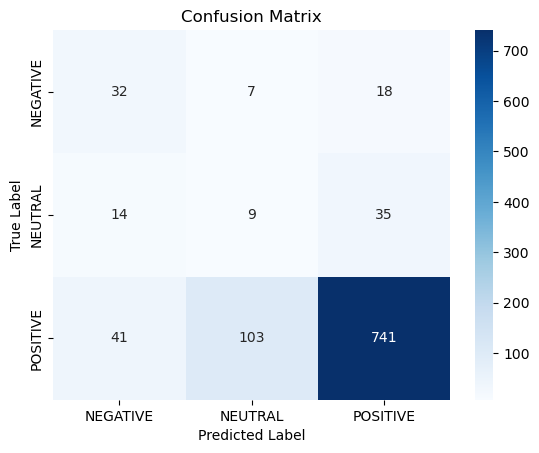

In [100]:
cm = confusion_matrix(sampled_df_vadr['label'], sampled_df_vadr['predict_label'], labels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [101]:
#7. Validate the results of both models and provide a comparision table.

In [102]:
df_report_textblob = pd.DataFrame(report_textblob).T[['precision', 'recall', 'f1-score']].drop(['accuracy'])
df_report_vadr = pd.DataFrame(report_vadr).T[['precision', 'recall', 'f1-score']].drop(['accuracy'])

In [103]:
df_comparison = df_report_textblob.add_suffix("textblob").join(df_report_vadr.add_suffix("vadr"))

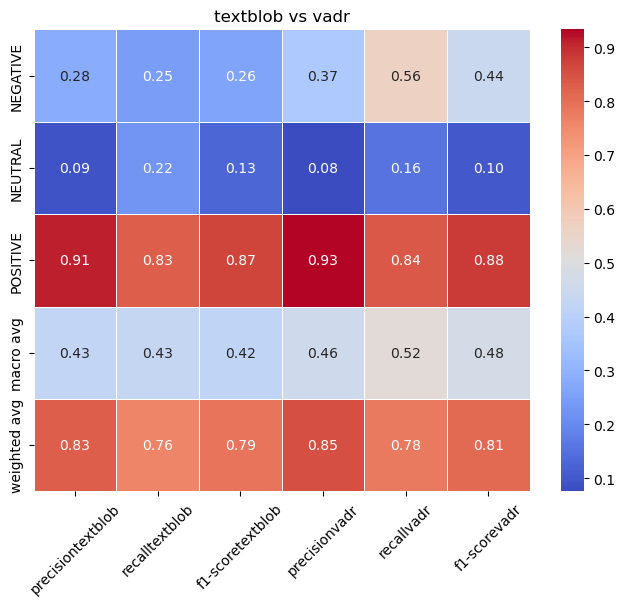

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_comparison, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("textblob vs vadr")
plt.xticks(rotation=45)
plt.show()